<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">


# Web Scraping for Indeed.com and Predicting Salaries

### Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal wants you to

   - determine the industry factors that are most important in predicting the salary amounts for these data.

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries.

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer this question.

---

### Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to address the question above.

### Factors that impact salary

To predict salary the most appropriate approach would be a regression model.
Here instead we just want to estimate which factors (like location, job title, job level, industry sector) lead to high or low salary and work with a classification model. To do so, split the salary into two groups of high and low salary, for example by choosing the median salary as a threshold (in principle you could choose any single or multiple splitting points).

Use all the skills you have learned so far to build a predictive model.
Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to be able to extrapolate or predict the expected salaries for these listings.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10").

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

The URL here has many query parameters:

- `q` for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- `l` for a location 
- `start` for what result number to start on

In [551]:
# URL for US and UK 

URL = 'http://www.indeed.com/jobs'
URL_UK = 'http://www.indeed.co.uk/jobs'

In [3]:
import requests
import bs4
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
import pandas as pd
import numpy as np
from bs4 import SoupStrainer
import re
import matplotlib.pyplot as plt

In [ ]:
## Setting the filters and param
# Running a request and returning results through beautiful soup

filters = SoupStrainer('div', class_='jobsearch-SerpJobCard unifiedRow row result')
param = {'q':'data scientist $20,000', 'l':'New York', 'start':'10'}
r = requests.get(url = URL, params = param)
result = BeautifulSoup(r.text, 'html.parser', parse_only=filters)
print(result.prettify())

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is in a `span` with `class='salaryText'`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element='jobTitle'`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 
- Decide which other components could be relevant, for example the region or the summary of the job advert.

In [ ]:
location = result.find('span', attrs={'class':'location'}).text
title = result.find('a', attrs={'data-tn-element':'jobTitle'}).text
salary = result.find('span', attrs={'class':'salaryText'})
company = result.find('span', attrs={'class':'company'}).text
description = result.find('div', attrs={'class':'summary'}).text

### Write 4 functions to extract each item: location, company, job, and salary.

Example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- **Make sure these functions are robust and can handle cases where the data/field may not be available.**
    - Remember to check if a field is empty or `None` for attempting to call methods on it.
    - Remember to use `try/except` if you anticipate errors.
- **Test** the functions on the results above and simple examples.

In [553]:
def extract_location(result):
    try:
        j_location = result.find(class_="location").text
    except:
        j_location = np.nan
    return j_location

def extract_title(result):
    try:
        j_title=result.find('a', attrs={'data-tn-element':'jobTitle'}).text.strip()
    except:
        j_title = np.nan
    return j_title

def extract_company(result):
    try:
        j_company=result.find('span', attrs={'class':'company'}).text
    except:
        j_company=np.nan
    return j_company


def extract_salary(result):
    try:
        j_salary=result.find('span', attrs={'class':'salaryText'}).text
    except:
        j_salary=np.nan
    return j_salary

def extract_summary(result):
    try:
        j_summary=result.find('div', attrs={'class':'summary'}).text
    except:
        j_summary=np.nan
    return j_summary

In [554]:
def scrap_field(x):
    j_location = []
    j_salary = []
    j_title =[]
    j_company=[]
    j_summary=[]
    
    for job in x:
        j_location.append(extract_location(job))
        j_title.append(extract_title(job))
        j_company.append(extract_company(job))
        j_salary.append(extract_salary(job))
        j_summary.append(extract_summary(job))
    

    jobs = pd.DataFrame({'Location': j_location,
                     'Title': j_title,
                     'Price': j_salary,
                     'Company':j_company,
                      'Summary':j_summary})
 
    return jobs

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search.
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different.

In [557]:
max_results_per_state = 1000 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

import re 
state_results = pd.DataFrame()

filters = SoupStrainer("div", class_="jobsearch-SerpJobCard unifiedRow row result")

for state in set( ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia','Hawaii',
  'Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan',
  'Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York'
  ,'North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota'
  ,'Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming']):
    if state == 'California' or state == 'New York':
        for start in tqdm_notebook(range(0, 5000, 10)):
            # Grab the results from the request (as above)
            param = {'q':'data scientist', 'l':state, 'start':start}
            r = requests.get(url = URL, params = param)
            result = BeautifulSoup(r.text, 'html.parser', parse_only=filters)
            # Append to the full set of results
            state_results = state_results.append(scrap_field(result))
    else:
        for start in tqdm_notebook(range(0, max_results_per_state, 10)):
            # Grab the results from the request (as above)
            param = {'q':'data scientist', 'l':state, 'start':start}
            r = requests.get(url = URL, params = param)
            result = BeautifulSoup(r.text, 'html.parser', parse_only=filters)
            # Append to the full set of results
            state_results = state_results.append(scrap_field(result))
  

In [521]:
max_results_per_country = 2000 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

country_results = pd.DataFrame()

filters = SoupStrainer("div", class_="jobsearch-SerpJobCard unifiedRow row result")

for start in tqdm_notebook(range(0, max_results_per_country, 10)):
    # Grab the results from the request (as above)
    param = {'q':'data scientist', 'l':'United Kingdom', 'start':start}
    r = requests.get(url = URL_UK, params = param)
    result = BeautifulSoup(r.text, 'html.parser', parse_only=filters)
    # Append to the full set of results
    country_results = country_results.append(scrap_field(result))

In [558]:
# Returning rows with a salary (=Price) for the US states

state = state_results[~state_results.Price.isnull()]

In [522]:
# Returning rows with a salary (=Price) for the UK

country = country_results[~country_results.Price.isnull()]


In [524]:
# Saving df to csv

country.to_csv(r'UK_salary.csv')

In [559]:
state.to_csv(r'US_state_salary.csv')

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now.
1. Some of the entries may be duplicated.
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries.

In [19]:
## DataCleaning for the UK dataset

salary_UK = pd.read_csv('UK_salary.csv')
salary_UK = salary_UK.drop(columns = 'Unnamed: 0')

# Removing all non word characters except '-' and '\n':

salary_UK.Price.replace(to_replace=r'[^\w-]', value='', regex=True,inplace=True)
salary_UK.replace(to_replace=r'\n', value='', regex=True,inplace=True)

# Selecting yearly salary and removing annotation
salary_UK.sort_values(by='Company')
salary_UK = salary_UK[(salary_UK.Price.str.contains ('year'))]
salary_UK.Price = salary_UK.Price.str.replace('ayear','')

# Extracting numbers from range and returning average:

salary_UK.Price = salary_UK.Price.apply(lambda y:(int(y[:6])+int(y[7:]))/2 if len(y) >= 13 else
                (int(y[:5])+int(y[6:]))/2 if len(y) >= 11 else
                np.nan if len(y) >= 7 else y)

# Removing nan resulting from incorrect salary

salary_UK = salary_UK[~salary_UK.Price.isnull()]

# Converting salary columns to integer:

def convert_col_type(df,col,t):
    df[col] = df[col].astype(t)

convert_col_type(salary_UK,['Price'],int)

# Dropping duplicates

salary_UK.drop_duplicates(inplace = True, keep = 'last')

salary_UK.head()

,Location,Title,Price,Company,Summary
3,London,Data Scientist,33103,UK Government - National Crime Agency,Develop innovative solutions to data challenge...
4,London NW9,919-AP-11862797-EXT - Assistant Healthcare Sci...,23327,Public Health England,Data from clinical vaccine trials help to gene...
5,United Kingdom,Data and Technology Graduate Scheme 2020,27500,EDF Energy Limited,"Ingesting data, preparing data, wrangling data..."
14,London,Data Scientist,47500,Chaser Technologies Limited,"As our first data scientist, you’ll be instru..."
19,United Kingdom,Water Quality Distribution Scientist,35000,South East Water,Excellent analytical and interpretation skills...


In [ ]:
# Saving df to csv
salary_UK.to_csv('UK_salary_clean',index=False)

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary.

In [20]:
salary_US = pd.read_csv('US_state_salary.csv')
salary_US = salary_US.drop(columns = 'Unnamed: 0')

# Removing all non word characters except '-' and '\n':

salary_US.Price.replace(to_replace=r'[^\w-]', value='', regex=True,inplace=True)
salary_US.replace(to_replace=r'\n', value='', regex=True,inplace=True)

# Selecting yearly salary and removing annotation
salary_US.sort_values(by='Company')
salary_US = salary_US[(salary_US.Price.str.contains ('year'))]
salary_US.Price = salary_US.Price.str.replace('ayear','')

# Extracting numbers from range and returning average:
salary_US.Price = salary_US.Price.apply(lambda y:(int(y[:6])+int(y[7:]))/2 if len(y) >= 13 else
                (int(y[:5])+int(y[6:]))/2 if len(y) >= 11 else
                np.nan if len(y) >= 7 else y)

# Removing nan resulting from incorrect salary
salary_US = salary_US[~salary_US.Price.isnull()]

# Converting salary columns to integer:
convert_col_type(salary_US,['Price'],int)

# Removing duplicates
salary_US.drop_duplicates(inplace = True, keep = 'last')

salary_US.head()

,Location,Title,Price,Company,Summary
0,"Orlando, FL 32801 (Central Business District a...",Data Scientist (Database Administrator),95160,"Orange County Government, Florida","Posting Closes: October 30, 2019 (posting sub..."
1,"Sanford, FL",RESEARCH STATISTICIAN,49784,Seminole County Sheriff's Office,This position performs professional work apply...
2,"Davie, FL","District Director, Research and Data Science",81535,Broward College,"Expertise in Predictive Modeling, Applied Mac..."
3,"Tampa, FL",Python Architect / Data Scientist,130000,Aceolution Inc,Aceolution is placing the candidate for a top ...
69,"Columbia, SC 29223",Statistician III,40759,State of South Carolina,Performs detailed statistical analysis and re...


In [592]:
salary_US.to_csv('US_state_salary_clean',index=False)

### Load in the the data of scraped salaries

In [21]:
## Loading UK dataset

Uk_sal = pd.read_csv('UK_salary_clean')
Uk_sal.head()

,Location,Title,Price,Company,Summary
0,London,Data Scientist,33103,UK Government - National Crime Agency,Develop innovative solutions to data challenge...
1,London NW9,919-AP-11862797-EXT - Assistant Healthcare Sci...,23327,Public Health England,Data from clinical vaccine trials help to gene...
2,United Kingdom,Data and Technology Graduate Scheme 2020,27500,EDF Energy Limited,"Ingesting data, preparing data, wrangling data..."
3,London,Data Scientist,47500,Chaser Technologies Limited,"As our first data scientist, you’ll be instru..."
4,United Kingdom,Water Quality Distribution Scientist,35000,South East Water,Excellent analytical and interpretation skills...


In [160]:
# Get names of indexes for which column Location has value UK

indexNames = Uk_sal[ Uk_sal['Location'] == 'United Kingdom' ].index
 
# Delete these row indexes from dataFrame
Uk_sal.drop(indexNames , inplace=True)

In [161]:
# Convert GBP to USD @ 1.29

Uk_sal['Price'] = Uk_sal['Price'] * 1.29

In [162]:
Uk_sal.head()

,Location,Title,Price,Company,Summary
0,London,Data Scientist,42702.87,UK Government - National Crime Agency,Develop innovative solutions to data challenge...
1,London NW9,919-AP-11862797-EXT - Assistant Healthcare Sci...,30091.83,Public Health England,Data from clinical vaccine trials help to gene...
3,London,Data Scientist,61275.00,Chaser Technologies Limited,"As our first data scientist, you’ll be instru..."
5,London,Assistant Healthcare Scientist,30091.83,Public Health England,Public Health England (PHE) is an executive ag...
6,London,Data Scientist,61275.00,Virgin Media,Advanced data preparation and munging skills w...


In [23]:
# Loading US dataset

US_sal  = pd.read_csv('US_state_salary_clean')
US_sal.head()

,Location,Title,Price,Company,Summary
0,"Orlando, FL 32801 (Central Business District a...",Data Scientist (Database Administrator),95160,"Orange County Government, Florida","Posting Closes: October 30, 2019 (posting sub..."
1,"Sanford, FL",RESEARCH STATISTICIAN,49784,Seminole County Sheriff's Office,This position performs professional work apply...
2,"Davie, FL","District Director, Research and Data Science",81535,Broward College,"Expertise in Predictive Modeling, Applied Mac..."
3,"Tampa, FL",Python Architect / Data Scientist,130000,Aceolution Inc,Aceolution is placing the candidate for a top ...
4,"Columbia, SC 29223",Statistician III,40759,State of South Carolina,Performs detailed statistical analysis and re...


In [24]:
# Appending UK df to US DF

US_sal = US_sal.append(Uk_sal,ignore_index=True)

In [25]:
US_sal.head()

,Location,Title,Price,Company,Summary
0,"Orlando, FL 32801 (Central Business District a...",Data Scientist (Database Administrator),95160,"Orange County Government, Florida","Posting Closes: October 30, 2019 (posting sub..."
1,"Sanford, FL",RESEARCH STATISTICIAN,49784,Seminole County Sheriff's Office,This position performs professional work apply...
2,"Davie, FL","District Director, Research and Data Science",81535,Broward College,"Expertise in Predictive Modeling, Applied Mac..."
3,"Tampa, FL",Python Architect / Data Scientist,130000,Aceolution Inc,Aceolution is placing the candidate for a top ...
4,"Columbia, SC 29223",Statistician III,40759,State of South Carolina,Performs detailed statistical analysis and re...


### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median).

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries.

In [26]:
# Describe Salary 

US_sal.describe()

,Price
count,583.000000
mean,74423.259005
std,36318.603430
min,16500.000000
25%,45000.000000
50%,72500.000000
75%,100000.000000
max,275000.000000


In [167]:
# Creating salary bins

bins=[21930,55000,85000,105000,250000]
US_sal_bins = pd.cut(US_sal['Price'], bins=bins).value_counts()

US_sal_bins

(55000, 85000]      145
(21930, 55000]      145
(85000, 105000]     141
(105000, 250000]    139
Name: Price, dtype: int64

In [27]:
# Using bins to split salart into 4 categories 'High','HighMid', 'LowMid' & 'Low'

US_sal['Salary_category'] = US_sal.Price.apply(lambda x: 'Low' if x <= 55000 else 'LowMid' if x <= 85000 
                                            else 'HighMid' if x <=105000 else 'High')
US_sal

,Location,Title,Price,Company,Summary,Salary_category
0,"Orlando, FL 32801 (Central Business District a...",Data Scientist (Database Administrator),95160,"Orange County Government, Florida","Posting Closes: October 30, 2019 (posting sub...",HighMid
1,"Sanford, FL",RESEARCH STATISTICIAN,49784,Seminole County Sheriff's Office,This position performs professional work apply...,Low
2,"Davie, FL","District Director, Research and Data Science",81535,Broward College,"Expertise in Predictive Modeling, Applied Mac...",LowMid
3,"Tampa, FL",Python Architect / Data Scientist,130000,Aceolution Inc,Aceolution is placing the candidate for a top ...,High
4,"Columbia, SC 29223",Statistician III,40759,State of South Carolina,Performs detailed statistical analysis and re...,Low
5,"Columbia, SC 29208",Geospatial Data Scientist,55000,University of South Carolina,"Master’s degree in public health, health servi...",Low
6,"Aiken County, SC",Statistician III (3IER19),40759,State of South Carolina,Applying appropriate statistical analysis for ...,Low
7,"Columbia, SC 29208",Geospatial Data Scientist,55000,University of South Carolina,With more than 20 years of uninterrupted fundi...,Low
8,"Columbia, SC 29208",Geospatial Data Scientist,55000,University of South Carolina,With more than 20 years of uninterrupted fund...,Low
9,"Columbia, SC 29208",Geospatial Data Scientist,55000,University of South Carolina,"Master’s degree in public health, health serv...",Low


In [28]:
US_sal.Salary_category.value_counts()

Low        214
LowMid     171
High       107
HighMid     91
Name: Salary_category, dtype: int64

In [29]:
US_sal.to_csv('Final.csv')

#### Thought experiment: What is the baseline accuracy for this model?

In [169]:
## Normalising class value counts

US_sal.Salary_category.value_counts(normalize=True)

Low        0.255245
LowMid     0.253497
HighMid    0.246503
High       0.244755
Name: Salary_category, dtype: float64

In [170]:
# Calculating baseline accuracy

baseline_acc = US_sal.Salary_category.value_counts(normalize=True).max()
baseline_acc

0.25524475524475526

In [36]:
# Creating df with Salary_category (target) & location (feature)

salary_vs_location = US_sal[['Salary_category','Location']]

salary_vs_location.head()

,Salary_category,Location
0,HighMid,"Orlando, FL 32801 (Central Business District a..."
1,Low,"Sanford, FL"
2,LowMid,"Davie, FL"
3,High,"Tampa, FL"
4,Low,"Columbia, SC 29223"


In [37]:
# Dummifying location

salary_vs_location = pd.get_dummies(salary_vs_location,columns=['Location'],drop_first=True)
salary_vs_location.head()

,Salary_category,"Location_Aiken County, SC","Location_Albuquerque, NM 87110 (Uptown area)","Location_Alexandria, VA","Location_Alexandria, VA 22314 (Southwest Quadrant area)","Location_Anchorage, AK","Location_Atlanta, GA","Location_Atlanta, GA 30303 (Five Points area)","Location_Atlanta, GA 30305 (Buckhead area)","Location_Atlanta, GA 30307",...,Location_United Kingdom,"Location_Vienna, VA",Location_Wembley,Location_West London,Location_West Midlands,Location_Westminster,Location_White City,Location_Wimbledon,"Location_Woodlawn, MD",Location_Yorkshire
0,HighMid,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Low,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,LowMid,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,High,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Low,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create a classification model to predict High/Low salary. 


- Start by ONLY using the location as a feature.
- Use at least two different classifiers you find suitable.
- Remember that scaling your features might be necessary.
- Display the coefficients/feature importances and write a short summary of what they mean.
- Create a few new variables in your dataframe to represent interesting features of a job title (e.g. whether 'Senior' or 'Manager' is in the title).
- Incorporate other text features from the title or summary that you believe will predict the salary.
- Then build new classification models including also those features. Do they add any value?
- Tune your models by testing parameter ranges, regularization strengths, etc. Discuss how that affects your models.
- Discuss model coefficients or feature importances as applicable.

In [32]:
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [38]:
# Declaring target and X matrix

y = salary_vs_location.pop('Salary_category')
X= salary_vs_location


In [39]:
# Setting a train-test split 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.4, random_state=1)

In [40]:
# Scaling features 

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(
    X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(
    X_test), columns=X_test.columns, index=X_test.index)

## Logistic regression

In [41]:
# Setting a grid search on a Logistic regression

model_lr = LogisticRegression(solver='liblinear', multi_class='ovr')

params = {'C': np.logspace(-4, 4, 10),
          'penalty': ['l1', 'l2'],
          'fit_intercept': [True, False]}

gs_lr = GridSearchCV(estimator=model_lr,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs_lr.fit(X_train, y_train)

# extract the grid search results

print('Best Parameters:')
print(gs_lr.best_params_)
print('Best estimator C:')
print(gs_lr.best_estimator_.C)


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Best Parameters:
{'C': 0.3593813663804626, 'fit_intercept': False, 'penalty': 'l1'}
Best estimator C:
0.3593813663804626


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [43]:
# Fitting a Logstic regression using best params

model_lr = LogisticRegression(solver='liblinear', multi_class='ovr',C=0.3593813663804626,penalty='l1')
model_lr.fit(X_train, y_train)

print("Train score: ", model_lr.score(X_train, y_train))
print("Train CV score: ", cross_val_score(model_lr, X_train, y_train, cv=5).mean())
print("Test score: ", model_lr.score(X_test, y_test))
print("Test CV score: ", cross_val_score(model_lr, X_test, y_test, cv=5).mean())

Train score:  0.7736389684813754
Train CV score:  0.6073528296805557
Test score:  0.6196581196581197
Test CV score:  0.5731427396737294


### Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
# gridsearch params
dtc_params = {
    'max_depth': list(range(1, 11))+[None],
    'max_features': [None, 1, 2, 3],
    'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]
}

# set the gridsearch
model = DecisionTreeClassifier(random_state=1)
dtc_gs = GridSearchCV(model, dtc_params, cv=5, verbose=1, iid=False)

# use the gridearch model to fit the data
dtc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 484 candidates, totalling 2420 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2420 out of 2420 | elapsed:    5.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1,
                                              splitter='best'),
             iid=False, n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'max_features': [None, 1, 2, 3],
     

In [47]:
print(dtc_gs.best_params_)
print(dtc_gs.best_score_)

{'max_depth': None, 'max_features': 3, 'min_samples_split': 10}
0.6243785131933974


In [48]:
DTC = DecisionTreeClassifier(criterion='gini',
                                    max_depth=None,
                                    max_features=3,
                                    min_samples_split=10,
                                    random_state=1)
DTC.fit(X_train, y_train)

print("Train score: ", DTC.score(X_train, y_train))
print("Train CV score: ", cross_val_score(DTC, X_train, y_train, cv=5).mean())
print("Test score: ", DTC.score(X_test, y_test))
print("Test CV score: ", cross_val_score(DTC, X_test, y_test, cv=5).mean())

Train score:  0.7621776504297995
Train CV score:  0.6243785131933974
Test score:  0.6239316239316239
Test CV score:  0.5185881888987479


Random Forest, bagging, knn & adaboost models were dropped as they didn't have the highest scores.

Logistic Regression has the best test score using only one feature (Location).

### NLP on Title

Summary had similar results to Title and has been removed to avoid duplicate entries.

In [49]:
import re
import nltk
from nltk.corpus import stopwords
import pandas as pd
stop_words = set(stopwords.words('english'))
import string

In [50]:
# Setting a stop words list

numbers=[0,1,2,3,4,5,6,7,8,9]
stop = stopwords.words('english') + list(string.punctuation) + list(numbers)


In [51]:
# Creating a new df and dummifying Location

df_text = US_sal[['Location','Salary_category','Title','Company']]
df_text = pd.get_dummies(df_text,columns=['Location'],drop_first=True)

df_text.shape

(583, 172)

In [52]:
# Getting a train split

df = df_text
df_train, df_test = train_test_split(df,test_size=0.4, random_state=1)

# Declaring X matrix for NLP modeling 

Xtf = df_text.Title

In [409]:
df_train.shape

(343, 171)

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fitting a TfidVectorizer model on the Title feature
# Token pattern to exclude digits and max features set to 40 (best number)

tvec = TfidfVectorizer(stop_words = stop,token_pattern=r'\b[^\d\W]+\b',max_features=40)
tvec.fit(Xtf)
len(tvec.get_feature_names())

40

In [59]:
# Plotting the results in a dataframe 

df1 = pd.DataFrame(tvec.transform(Xtf).todense(),
                  columns=tvec.get_feature_names(),
                  index=Xtf)
df1 = df1.reset_index()

In [60]:
df1.head()

,Title,ai,analyst,analytics,assistant,associate,aws,casino,computational,data,...,quality,quantitative,research,science,scientist,senior,software,sr,statistical,statistician
0,Data Scientist (Database Administrator),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.645333,...,0.0,0.0,0.000000,0.000000,0.763901,0.0,0.0,0.0,0.0,0.000000
1,RESEARCH STATISTICIAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.736943,0.000000,0.000000,0.0,0.0,0.0,0.0,0.675955
2,"District Director, Research and Data Science",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.184244,...,0.0,0.0,0.490022,0.508162,0.000000,0.0,0.0,0.0,0.0,0.000000
3,Python Architect / Data Scientist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283000,...,0.0,0.0,0.000000,0.000000,0.334996,0.0,0.0,0.0,0.0,0.000000
4,Statistician III,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000


In [61]:
# Adding tfid df to the original dataframe 

df_result = pd.concat([df1, df_text], axis=1, sort=False)

In [62]:
df_result.head()

,Title,ai,analyst,analytics,assistant,associate,aws,casino,computational,data,...,Location_United Kingdom,"Location_Vienna, VA",Location_Wembley,Location_West London,Location_West Midlands,Location_Westminster,Location_White City,Location_Wimbledon,"Location_Woodlawn, MD",Location_Yorkshire
0,Data Scientist (Database Administrator),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.645333,...,0,0,0,0,0,0,0,0,0,0
1,RESEARCH STATISTICIAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,"District Director, Research and Data Science",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.184244,...,0,0,0,0,0,0,0,0,0,0
3,Python Architect / Data Scientist,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283000,...,0,0,0,0,0,0,0,0,0,0
4,Statistician III,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0


## Adding top words feature

In [63]:
# Declaring target and variables

dfX = df_result.copy()
y = dfX.pop('Salary_category')
X = dfX
X.drop(columns=['Title','Company'],inplace=True)

In [64]:
# Getting a train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.4, random_state=1)

In [65]:
# Scaling the features

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(
    X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(
    X_test), columns=X_test.columns, index=X_test.index)

### Logistic Regression

In [66]:
# Setting the params

params = {'C': np.logspace(-4, 4, 10),
          'penalty': ['l1', 'l2'],
          'fit_intercept': [True, False]}

# Setting a gridsearch and fitting a model

model = LogisticRegression(solver='liblinear', multi_class='ovr')
gs_lr = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs_lr.fit(X_train, y_train)

# extract the grid search results


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='ovr',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2']},
             pre_d

In [67]:
print(gs_lr.best_params_)

{'C': 166.81005372000558, 'fit_intercept': False, 'penalty': 'l1'}


In [69]:
# Fitting a Logistic regression model using best params

lr = LogisticRegression(solver='liblinear', multi_class='ovr',C=166.81005372000558,fit_intercept=False,penalty='l1')
lr.fit(X_train, y_train)

print("Train score: ", lr.score(X_train, y_train))
print("Train CV score: ", cross_val_score(lr, X_train, y_train, cv=5).mean())
print("Test score: ", lr.score(X_test, y_test))
print("Test CV score: ", cross_val_score(lr, X_test, y_test, cv=5).mean())

Train score:  0.8911174785100286
Train CV score:  0.655895783910625
Test score:  0.6623931623931624
Test CV score:  0.6024130256481255


### Decision Tree

In [70]:
# Setting the params

dtc_params = {
    'max_depth': list(range(1, 11))+[None],
    'max_features': [None, 1, 2, 3],
    'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]
}

# set the gridsearch
model = DecisionTreeClassifier(random_state=1)
dtc_gs = GridSearchCV(model, dtc_params, cv=5, verbose=1, iid=False)

# use the gridearch model to fit the data
dtc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 484 candidates, totalling 2420 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2420 out of 2420 | elapsed:    5.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1,
                                              splitter='best'),
             iid=False, n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'max_features': [None, 1, 2, 3],
     

In [71]:
print(dtc_gs.best_params_)

{'max_depth': None, 'max_features': None, 'min_samples_split': 2}


In [72]:
# Fitting a decision tree using best params

DTC = DecisionTreeClassifier(criterion='gini',
                                    max_depth=None,
                                    max_features=None,
                                    min_samples_split=2,
                                    random_state=1)
DTC.fit(X_train, y_train)

print("Train score: ", DTC.score(X_train, y_train))
print("Train CV score: ", cross_val_score(DTC, X_train, y_train, cv=5).mean())
print("Test score: ", DTC.score(X_test, y_test))
print("Test CV score: ", cross_val_score(DTC, X_test, y_test, cv=5).mean())

Train score:  0.9398280802292264
Train CV score:  0.6513449323391328
Test score:  0.7094017094017094
Test CV score:  0.5641654552662879


## Adding the company feature

In [73]:
# Creating new df adding company as a dummy variable

df2_result = df_result.copy()

df2_result = pd.get_dummies(df2_result,columns=['Company'],drop_first=True)

df2_result.drop(columns=['Title'],inplace=True)

In [74]:
df2_result.head()

,ai,analyst,analytics,assistant,associate,aws,casino,computational,data,devops,...,"Company_Xyken, LLC",Company_ZUNA,Company_Zarathustra Technologies Ltd.,Company_Zelus Analytics,Company_ZenShin Talent,Company_Zeneesha Limited,Company_causaLens,Company_decisionLab Ltd,Company_kdr Recruitment,Company_onezeero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.645333,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.184244,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283000,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
# Declaring target and variables 

dfZ = df2_result.copy()
y = dfZ.pop('Salary_category')
X = dfZ

In [113]:
# Getting a train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.4, random_state=1)

In [114]:
# Scaling X features

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(
    X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(
    X_test), columns=X_test.columns, index=X_test.index)

### Logistic Regression

In [78]:
# Setting the parameters

params = {'C': np.logspace(-4, 4, 10),
          'penalty': ['l1', 'l2'],
          'fit_intercept': [True, False]}

# Setting the model

lr = LogisticRegression(solver='liblinear', multi_class='ovr')


# Running a grid search & fitting the model

gs_lr = GridSearchCV(estimator=lr,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs_lr.fit(X_train, y_train)

# extract the grid search results

print('Best Parameters:')
print(gs_lr.best_params_)
print('Best estimator C:')
print(gs_lr.best_estimator_.C)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters:
{'C': 166.81005372000558, 'fit_intercept': True, 'penalty': 'l1'}
Best estimator C:
166.81005372000558


In [115]:
# Fitting a logistic regression model using best params

lr = LogisticRegression(solver='liblinear', multi_class='ovr',C=166.81005372000558,fit_intercept=True,penalty='l1')
lr.fit(X_train, y_train)

print("Train score: ", lr.score(X_train, y_train))
print("Train CV score: ", cross_val_score(lr, X_train, y_train, cv=5).mean())
print("Test score: ", lr.score(X_test, y_test))
print("Test CV score: ", cross_val_score(lr, X_test, y_test, cv=5).mean())

Train score:  0.9914040114613181
Train CV score:  0.7047701554596119
Test score:  0.7222222222222222
Test CV score:  0.6338673983315188


In [116]:
# Displaying coef importance of the logistic regression model

coef = pd.DataFrame(lr.coef_.T,columns=lr.classes_,index=X.columns)

coef['importance'] = coef.mean(1)

coef.sort_values(by='importance',ascending=False)[:20]

,High,HighMid,Low,LowMid,importance
"Location_Omaha, NE",0.000000,3.865269,0.000000,0.000000,0.966317
Location_London,-0.160564,0.356001,0.000000,2.973272,0.792177
scientist,-0.055228,-0.669958,2.645015,1.232036,0.787966
"Location_Atlanta, GA 30305 (Buckhead area)",0.807247,2.813149,-0.373402,-0.247632,0.749841
data,0.186681,3.188587,2.286416,-2.701512,0.740043
"Location_St. Louis, MO 63130",0.000000,0.000000,0.000000,2.817514,0.704378
assistant,0.000000,0.000000,3.043337,-0.311054,0.683071
Company_Washington University in St. Louis,0.000000,0.000000,0.000000,2.730937,0.682734
"Location_Pittsburgh, PA",0.000000,0.000000,-0.764693,3.409435,0.661186
Company_Blue Pelican,0.000000,-0.037498,-0.410168,3.078004,0.657585


In [82]:
# Setting a grid search on the decision tree model 

dtc_params = {
    'max_depth': list(range(1, 11))+[None],
    'max_features': [None, 1, 2, 3],
    'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]
}

# set the gridsearch
model = DecisionTreeClassifier(random_state=1)
dtc_gs = GridSearchCV(model, dtc_params, cv=5, verbose=1, iid=False)

# use the gridearch model to fit the data
dtc_gs.fit(X_train, y_train)

print(dtc_gs.best_params_)

Fitting 5 folds for each of 484 candidates, totalling 2420 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'max_depth': None, 'max_features': None, 'min_samples_split': 2}


[Parallel(n_jobs=1)]: Done 2420 out of 2420 | elapsed:    6.6s finished


In [83]:
# Fitting a decision tree model using best params

DTC = DecisionTreeClassifier(criterion='gini',
                                    max_depth=None,
                                    max_features=None,
                                    min_samples_split=2,
                                    random_state=1)
DTC.fit(X_train, y_train)

print("Train score: ", DTC.score(X_train, y_train))
print("Train CV score: ", cross_val_score(DTC, X_train, y_train, cv=5).mean())
print("Test score: ", DTC.score(X_test, y_test))
print("Test CV score: ", cross_val_score(DTC, X_test, y_test, cv=5).mean())

Train score:  0.9914040114613181
Train CV score:  0.7048187162188818
Test score:  0.7393162393162394
Test CV score:  0.6061277350903358


In [84]:
DTC.classes_

array(['High', 'HighMid', 'Low', 'LowMid'], dtype=object)

In [85]:
# Displaying features importance for the decision tree model

feature_importances = pd.DataFrame(DTC.feature_importances_,
                                   index=X.columns,
                                   columns=['importance'])

feature_importances.sort_values(by='importance', ascending=False)[:20]

,importance
engineer,0.067299
data,0.049270
software,0.047850
senior,0.039813
Location_London,0.033579
statistician,0.031353
analyst,0.026973
research,0.023823
graduate,0.022349
devops,0.021724


### Model evaluation:

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs.


- Use cross-validation to evaluate your models.
- Evaluate the accuracy, AUC, precision and recall of the models.
- Plot the ROC and precision-recall curves for at least one of your models.

In [117]:
# Getting the 
predictions = lr.predict(X_test)
print(metrics.classification_report(y_test, predictions))


              precision    recall  f1-score   support

        High       0.80      0.65      0.72        43
     HighMid       0.79      0.61      0.69        36
         Low       0.70      0.86      0.77        86
      LowMid       0.69      0.65      0.67        69

    accuracy                           0.72       234
   macro avg       0.74      0.69      0.71       234
weighted avg       0.73      0.72      0.72       234



In [109]:
# Getting the confusion matrix

confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[26  4  6  7]
 [ 0 22  9  5]
 [ 3  0 74  9]
 [ 3  1 19 46]]


In [118]:
probabilities = lr.predict_proba(X_test)

In [91]:
import scikitplot as skplt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
cmap = ListedColormap(sns.color_palette("husl", len(lr.classes_)))

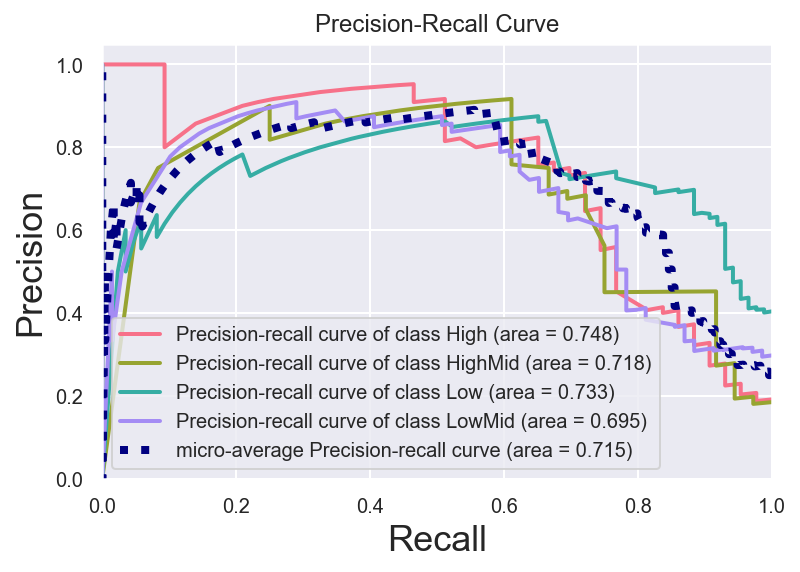

In [120]:
# Plotting precision_recall curve using test results

skplt.metrics.plot_precision_recall(y_test, probabilities, cmap=cmap)
plt.show()

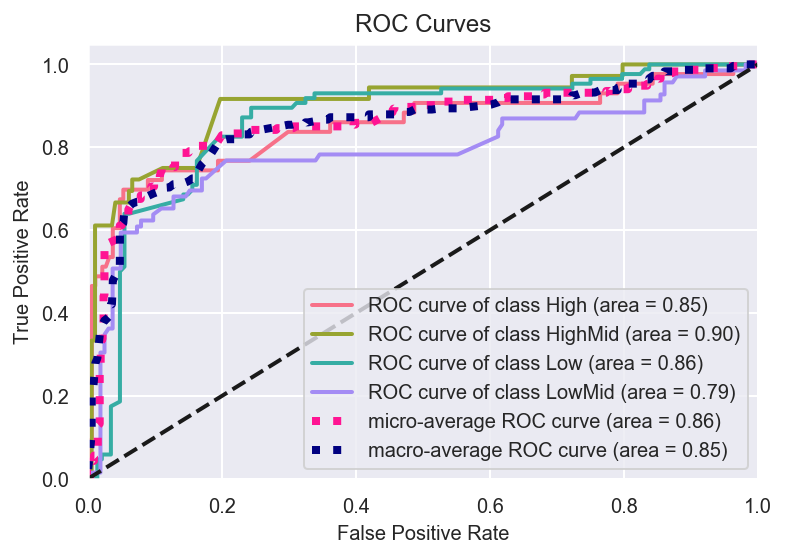

In [93]:
# Plotting the ROC curve using test results

skplt.metrics.plot_roc(y_test, probabilities, cmap=cmap)
plt.show()

Overall the area under the curves are acceptable. The Low mid class has the weakest scores on both curves but we focus on the high and high mid scores which are good. The model is biased but we won't add more features at this point. Changing the threshold didn't result in any improvements.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### Bonus:

- Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.
- Obtain the ROC/precision-recall curves for the different models you studied (at least the tuned model of each category) and compare.

In [445]:
## YOUR CODE HERE

### Summarize your results in an executive summary written for a non-technical audience.
   
- Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

In [446]:
## YOUR TEXT HERE IN MARKDOWN FORMAT 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### BONUS

Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

In [447]:
## YOUR LINK HERE IN MARKDOWN FORMAT 